In [23]:
import pandas as pd
import zipfile as zf


# import pandas the pandas library
import pandas as pd

# import zipfile library (we will use this to extract the file download from kaggle)
import zipfile


In [4]:
# extract the file from the downloaded zip file 
zipfile_name = 'archive.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [21]:
# read in the csv file as a pandas dataframe 
fintech = pd.read_csv("German_FinTechCompanies.csv")

In [23]:
# explore the data
fintech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                978 non-null    int64  
 1   Name                              978 non-null    object 
 2   Status                            978 non-null    int64  
 3   Original German                   973 non-null    float64
 4   Founding year                     960 non-null    float64
 5   Founder                           868 non-null    object 
 6   Linkedin-Account Founder          750 non-null    object 
 7   Legal Name                        966 non-null    object 
 8   Legal form                        959 non-null    object 
 9   Street                            964 non-null    object 
 10  Postal code                       962 non-null    object 
 11  City                              974 non-null    object 
 12  Country 

In [25]:
fintech.shape

(978, 24)

In [27]:
fintech

,ID,Name,Status,Original German,Founding year,Founder,Linkedin-Account Founder,Legal Name,Legal form,Street,...,Segment,Subsegment,Bank Cooperation,Homepage,E-Mail,Insolvency,Liquidation,Date of inactivity,Local court,Former name
0,1,CRX Markets,1,1.0,2012.0,Moritz von der Linden; Carlo Kölzer,https://www.linkedin.com/in/moritz-von-der-lin...,CRX Markets AG,AG,Landsberger Str. 191,...,Financing,Credit and Factoring,1,https://www.crxmarkets.com/de/,support@crxmarkets.com,0,0,NaN,München,NaN
1,2,aifinyo,1,1.0,2014.0,Andreas Dubrow; Philipp Kalwies,https://www.linkedin.com/in/andreas-dubrow/; h...,aifinyo AG,AG,Tiergartenstraße 8,...,Financing,Credit and Factoring,0,https://www.aifinyo.de/,andreas.dubrow@decimo.de\ninfo@aifinyo.de,0,0,NaN,Dresden,Rechnung48
2,3,fundflow,1,1.0,2016.0,Joachim Kaune; Antonio Faralli,https://www.linkedin.com/in/joachim-kaune-26ab...,Fundflow GmbH,GmbH,Prenzlauer Allee 53,...,Financing,Credit and Factoring,1,https://fundflow.de/,info@fundflow.de,0,0,NaN,Berlin (Charlottenburg),NaN
3,4,WIR BEWEGEN SH,1,1.0,2015.0,Investitionsbank Schleswig-Holstein,NaN,Investitionsbank Schleswig-Holstein (IB.SH),Anstalt des öffentlichen Rechts,Fleethörn 29-31,...,Financing,Donation-based Crowdfunding,0,https://www.wir-bewegen.sh/,info@wir-bewegen.sh,0,0,NaN,Kiel,NaN
4,5,Zusammen Gutes tun,1,1.0,2016.0,NaN,NaN,Evangelische Bank eG,eG,Kohlenstraße 132,...,Financing,Donation-based Crowdfunding,0,https://www.zusammen-gutes-tun.de/,info@eb.de,0,0,NaN,Kassel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,974,Tangany,1,1.0,2018.0,Alexey Utin; Christopher Zapf; Hans Nickel; Ma...,https://www.linkedin.com/in/alexey-utin-a26a43...,Tangany GmbH,GmbH,Agnes-Pockels-Bogen 1,...,Payments,Blockchain and Cryptocurrencies,0,https://tangany.com/,info@tangany.com,0,0,NaN,München,NaN
974,975,ver.de,1,1.0,2016.0,Marie-Luise Meinhold; Ch. Mussenbrock,https://www.linkedin.com/in/marie-luise-meinho...,ver.de für nachhaltige Entwicklung eG,eG,Frundsbergstr. 23,...,Other FinTechs,Insurance,0,https://www.ver.de/,kontak@ver.de,0,0,NaN,München,NaN
975,976,WeAdvise,1,1.0,1999.0,Paul Huber; Reinhard Tahedl; Rolf Henning Hackel,https://www.linkedin.com/in/paul-huber-905b777...,fundsaccess AG,AG,Lyonel-Feininger Str. 28,...,Asset Management,Robo-Advice,0,https://weadvise.de/,info@weadvise.de,0,0,NaN,München,Inter Fonds AG
976,977,XPAY,1,1.0,2016.0,Denis Raskopoljac,https://www.linkedin.com/in/denis-raskopoljac/,XPAY Solutions GmbH,GmbH,Stuntzstraße 16,...,Payments,Alternative Payment Methods,0,https://www.xpay.de/,info@xpay.de,0,0,NaN,München,NaN


In [12]:
import pandas as pd

# Read the German fintech csv 
df = pd.read_csv("German_FinTechCompanies.csv")

# Check the column names in the DataFrame
print(df.columns)

# Select only the "Bank Cooperation" column
bank_cooperation_values = df["Bank Cooperation"]

# Filter values for 1 or 0
filtered_values = bank_cooperation_values[bank_cooperation_values.isin([1, 0])]

# List the filtered values
print(filtered_values)

Index(['ID', 'Name', 'Status', 'Original German', 'Founding year', 'Founder',
       'Linkedin-Account Founder', 'Legal Name', 'Legal form', 'Street',
       'Postal code', 'City', 'Country', 'Register Number/ Company ID/ LEI',
       'Segment', 'Subsegment', 'Bank Cooperation', 'Homepage', 'E-Mail',
       'Insolvency', 'Liquidation', 'Date of inactivity', 'Local court',
       'Former name'],
      dtype='object')
0      1
1      0
2      1
3      0
4      0
      ..
973    0
974    0
975    0
976    0
977    0
Name: Bank Cooperation, Length: 978, dtype: int64


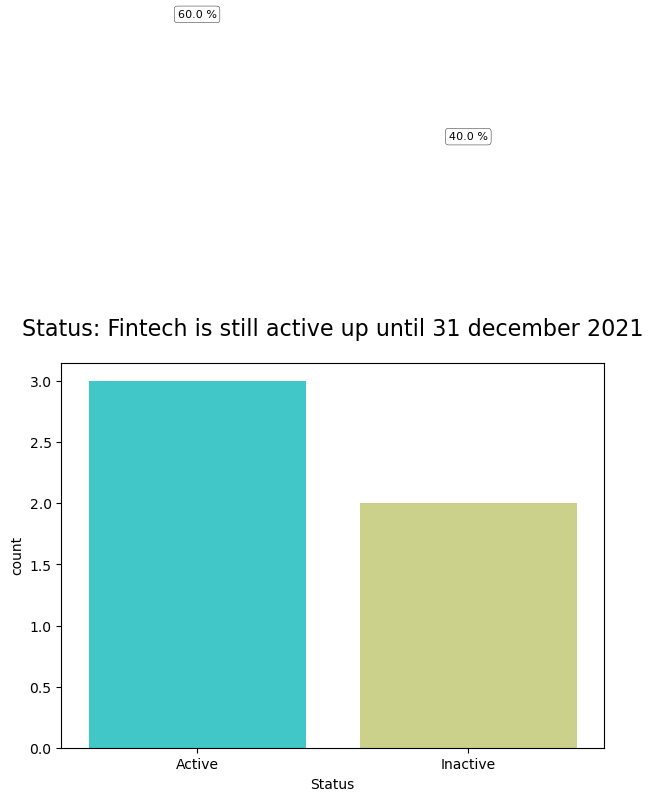

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df

def count_plot(df, col, title, fig_size=None, vert=True):
    plt.figure(figsize=fig_size, facecolor=None)
    total = float(len(df))
    
    if vert:
        ax = sns.countplot(x=df[col], hue=None, palette='rainbow',
                           order=df.groupby(col).size().sort_values().index[::-1])
        
        for p in ax.patches:
            height = p.get_height()
            
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + height + 3
            
            ax.text(x, y, '{:1.1f} %'.format((height/total)*100), ha='center', va='center', fontsize=8,
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
            ax.set_title(title, fontsize=16, y=1.05)

# Define the DataFrame
data = {'Status': ['Active', 'Inactive', 'Active', 'Active', 'Inactive']}
df = pd.DataFrame(data)

# Call the function with the defined DataFrame
count_plot(df, 'Status' , 'Status: Fintech is still active up until 31 december 2021', fig_size=(7,5), vert=True)

# writing the final data frame to an excel file for Tableau visualizations.
df.to_excel('German_Fintechs_final.xlsx', sheet_name='Data')